# Dylan Saunders

## Research question/interests

- #### What affect does the goverments economic system and practices have on the nations economic stability and consistancy?
- Comparing the countries India, New Zealand, and China which have very different economic systems
- #### How much inflation changes over time and if countries show similar trends or if every country tends to run on their own cycle?
- Using boxplot and can show how much variation the data is between countries and between years of the same country
- #### What is the difference in CPI changes between energy, food, and the total cpi?
- Comparing both Location and Subject of different countries can show the variations between all three subjects we can easily visualize how much of a difference there is between the subjects
- Inflation and CPI is said to change the world economy and potentially all of society, if that is the case I hope to learn as much as possible about it. 
- Learning to use dataset with finances will assist my future career developement of potentially working in the data analytics field for a finacial firm. 


## Analysis pipeline
- Load data
1. load data using a relative path  
- Clean data 
- change data type of time column to integer
1. drop columns Frequency and Flag Codes since their values are not necessary with our calculations
2. drop rows that have Q1, Q2, Q3, and Q4 to make data more simple and easier to work with
3. no columns remaining have NaN values
- Process data 
1. seperate the data set into the three subjects of the remaining rows ENRG, TOT, and FOOD
2. create max, min, and mean columns for each country and split into each subject
3. split data into different countries or subject and countries based on what counries we want to compare
- Wrangle data 
1. The data set is already assembled in and organized and clear way and the only restructuring required was changing time data type to int 
2. This data set is highly compreshensive no other data sets have been required to merge together


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
import code


In [ ]:
from code import project_functions1 as pf
df = pf.load_and_process(url_or_path_to_csv_file)
df

ImportError: cannot import name 'project_functions1' from 'code' (/Users/carlasaunders/miniconda3/lib/python3.10/code.py)

In [ ]:
def load_clean(path):
    df = pd.read_csv(path)
    dfclean=df.drop(columns=["Flag Codes", "FREQUENCY","INDICATOR", "MEASURE"]).drop(df.index[6075:293470]).reset_index(drop=True)
    df_time_int=pd.to_numeric(dfclean["TIME"])
    dfclean["TIME"]=df_time_int
    return dfclean
path ='./../data/raw/Inflationdataset.csv'
dfclean=load_clean(path)

In [ ]:
def load_ENRG(path):
    df = pd.read_csv('./../data/raw/Inflationdataset.csv')
    dfenergy=df.drop(columns=["Flag Codes", "FREQUENCY","INDICATOR", "MEASURE"]).drop(df.index[6075:293470]).loc[df['SUBJECT'] == "ENRG"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dfenergy["TIME"])
    dfenergy["TIME"]=df_time_int
    return dfenergy
path ='./../data/raw/Inflationdataset.csv'
dfenergy=load_clean(path)


In [ ]:
def load_FOOD(path):
    df = pd.read_csv('./../data/raw/Inflationdataset.csv')
    dffood=df.drop(columns=["Flag Codes", "FREQUENCY","INDICATOR", "MEASURE"]).drop(df.index[6075:293470]).loc[dfclean['SUBJECT'] == "FOOD"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dffood["TIME"])
    dffood["TIME"]=df_time_int
    return dffood
path ='./../data/raw/Inflationdataset.csv'
dffood=load_clean(path)

In [ ]:
def load_TOT(path):
    df = pd.read_csv('./../data/raw/Inflationdataset.csv')
    dftot=df.drop(columns=["Flag Codes", "FREQUENCY","INDICATOR", "MEASURE"]).drop(df.index[6075:293470]).loc[dfclean['SUBJECT'] == "TOT"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dftot["TIME"])
    dftot["TIME"]=df_time_int
    return dftot
path ='./../data/raw/Inflationdataset.csv'
dftot=load_clean(path)


[Text(0.5, 1.0, 'Canada Energy CPI from 1961-2022'),
 Text(0.5, 0, 'Years 1961 - 2022'),
 Text(0, 0.5, 'Energy CPI')]

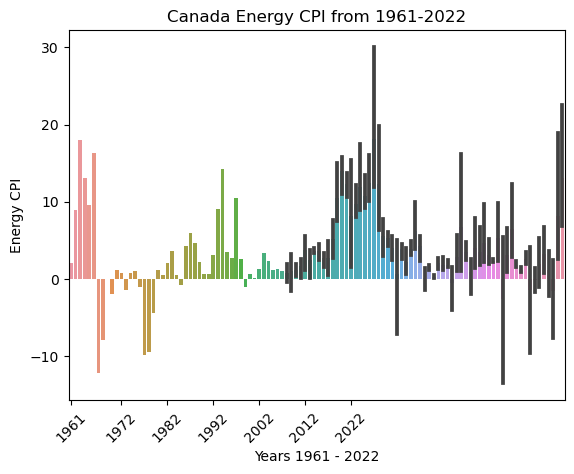

In [ ]:
df_enrg_CAN= dfenergy.loc[dfenergy['LOCATION']=="CAN"]
df_enrg_CAN.reset_index()

CAN_sub_plot=sns.barplot(data=df_enrg_CAN, x=df_enrg_CAN['TIME'], y=df_enrg_CAN['Value'])
CAN_sub_plot.set_xticklabels(CAN_sub_plot.get_xticklabels(range(20)), rotation=45)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
CAN_sub_plot.set(title='Canada Energy CPI from 1961-2022', xlabel='Years 1961 - 2022', ylabel='Energy CPI')
#Canadas CPI of energy from 1961-2022

In [ ]:
df_max=dfclean.groupby(by=["LOCATION","SUBJECT"]).agg({"Value":["max", "min", "mean"]})
df_max.columns = [ 'max','min', 'mean']
df_max


max        min       mean
LOCATION SUBJECT                                
AUS      ENRG     27.23942  -7.186137   6.580013
         FOOD     15.35854  -3.697105   4.654477
         TOT      19.42857  -0.319489   4.903905
AUT      ENRG     39.24276 -11.665090   4.183044
         FOOD     10.74824  -1.722898   2.888177
...                    ...        ...        ...
USA      FOOD     16.29268  -2.397707   3.520026
         TOT      13.54920  -0.355546   3.668527
ZAF      ENRG     26.78758  -2.461501   9.582968
         FOOD     25.25466   1.201602  10.373790
         TOT      18.65492  -0.692031   7.596606

[116 rows x 3 columns]

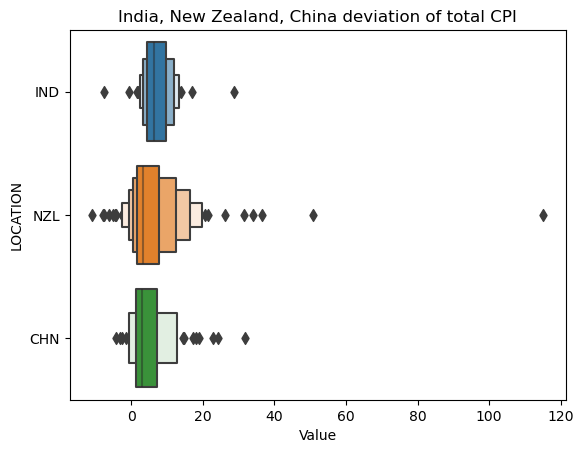

In [ ]:
df_tot_IND= dftot.loc[dftot['LOCATION']=="IND"].reset_index(drop=True)
df_tot_NZL= dftot.loc[dftot['LOCATION']=="NZL"].reset_index(drop=True)
df_tot_CHN= dftot.loc[dftot['LOCATION']=="CHN"].reset_index(drop=True)
df_tot_comp= pd.concat([df_tot_IND, df_tot_NZL,df_tot_CHN], ignore_index=True).reset_index(drop=True)
tot_comp_plot=sns.boxenplot(data=df_tot_comp, x="Value", y="LOCATION", scale="linear").set_title('India, New Zealand, China deviation of total CPI')

#this displays that in 3 countries with very different economic systems their CPI generally stays in the 
#same range. India is more socialist, New Zealand is more capitilist, China is more communist. 

<AxesSubplot:xlabel='TIME', ylabel='Value'>

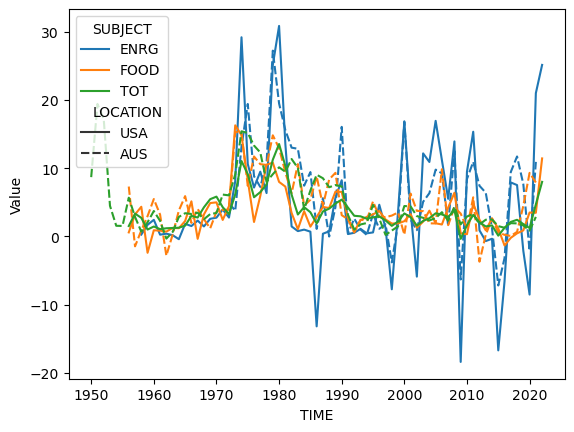

In [ ]:
df_USA= dfclean.loc[dfclean['LOCATION']=="USA"]
df_USA.reset_index()
df_AUS= dfclean.loc[dfclean['LOCATION']=="AUS"]
df_AUS.reset_index()
df_USA_AUS= pd.concat([df_USA, df_AUS], ignore_index=True)
sns.lineplot(data=df_USA_AUS, x= "TIME", y="Value",hue="SUBJECT", style="LOCATION")
